In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_curve, roc_auc_score

In [29]:
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('GB_Cleaned_dataset.csv')
df.columns

Index(['customer_number', 'Division', 'Customer_Type1', 'Customer_Type',
       'YearMonth', 'Monthly_SKUs_Purchased', 'Monthly_Vendors_Purchased',
       'Monthly_Number_of_Sales', 'Monthly_Last_Sales_Date',
       'Monthly_First_Sales_Date', 'Monthly_Sales_Days', 'Monthly_Sum_Sales',
       'Monthly_Gross_Margin', 'new_yearMonth', 'difference', 'churn',
       'Backlog_Sales'],
      dtype='object')

In [31]:
X = df[['Division', 'Customer_Type', 'Monthly_SKUs_Purchased', 'Monthly_Vendors_Purchased', 'Monthly_Number_of_Sales']]
Y = df['churn']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

In [33]:
# Define an array with values 1 through 10
neighbors = np.arange(1,101)

# Create empty arrays to store accuracy, AUC for each k
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

train_auc = np.empty(len(neighbors))
test_auc = np.empty(len(neighbors))


# Use a for-loop to calculate accuracy for each k
for i,k in enumerate(neighbors):
    # Define and fit knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    #Compute accuracy for training and testing set
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    
    # Compute probabilities of class membership
    train_probs = knn.predict_proba(x_train)
    test_probs = knn.predict_proba(x_test)
    
    # Keep one column of probabilities
    train_probs = train_probs[:,1]
    test_probs = test_probs[:,1]
    
    # Calculate AUC
    train_auc[i] = roc_auc_score(y_train, train_probs)
    test_auc[i] = roc_auc_score(y_test, test_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

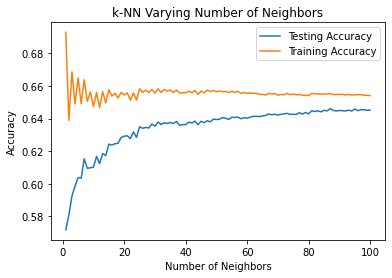

In [34]:
# Create a plot to see the accurcay results
plt.title('k-NN Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [35]:
print('the maximum testing accuracy is', max(test_accuracy))
print('the maximum occurs at k=', neighbors[np.argmax(test_accuracy)])

the maximum testing accuracy is 0.6461090410724228
the maximum occurs at k= 87


<function matplotlib.pyplot.show(close=None, block=None)>

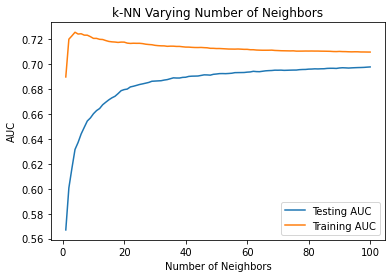

In [36]:
# Create a plot to see the AUC results
plt.title('k-NN Varying Number of Neighbors')
plt.plot(neighbors, test_auc, label='Testing AUC')
plt.plot(neighbors, train_auc, label='Training AUC')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('AUC')
plt.show

In [37]:
print('the maximum auc is', max(test_auc))
print('the maximum occurs at k=', neighbors[np.argmax(test_auc)])

the maximum auc is 0.6977521993411638
the maximum occurs at k= 100


In [38]:
# Define models for k of interest
knn19 = KNeighborsClassifier(n_neighbors=87)
knn19.fit(x_train, y_train)

knn20 = KNeighborsClassifier(n_neighbors=100)
knn20.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=100)

In [39]:
# Calculate probabilities of class membership
test_probs19 = knn19.predict_proba(x_test)
test_probs20 = knn20.predict_proba(x_test)

# Keep only one columns
test_probs19 = test_probs19[:,1]
test_probs20 = test_probs20[:,1]

In [40]:
# Calculate AUCs
auc19 = roc_auc_score(y_test, test_probs19)
auc20 = roc_auc_score(y_test, test_probs20)


In [41]:
# Calculate false positive rate and true positive rate
fpr19, tpr19, _ = roc_curve(y_test, test_probs19)
fpr20, tpr20, _ = roc_curve(y_test, test_probs20)

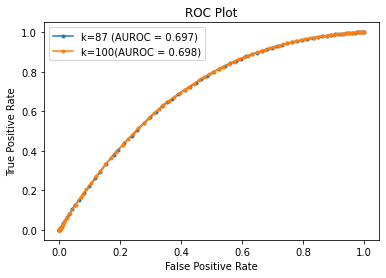

In [49]:
# Plot the ROC curve)
plt.plot(fpr19, tpr19, marker='.', label='k=87 (AUROC = %0.3f)' % auc19)
plt.plot(fpr20, tpr20, marker='.', label='k=100(AUROC = %0.3f)' % auc20)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [44]:
knn20 = KNeighborsClassifier(n_neighbors=100)
knn20.fit(x_train, y_train)

# Calculate accuracy
print('training accuracy is', knn20.score(x_train, y_train))
print('testing accuracy is', knn20.score(x_test, y_test))

training accuracy is 0.6541337650466404
testing accuracy is 0.6452182106300056


In [45]:
y_pred = knn20.predict(x_test)

In [46]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

[[43408 21042]
 [20377 31918]]


In [47]:
acc = (43408 + 31918)/(43408 + 21042 + 20377 + 31918)
sen = 31918/(20377 + 31918)
spi = 43408/(43408 + 21042)

In [48]:
print('Accuracy:' + str(acc))
print('SEN:' + str(sen))
print('SPI:' + str(spi))

Accuracy:0.6452182106300056
SEN:0.6103451572808107
SPI:0.6735143522110163
